In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
train_data =pd.read_csv("train.csv")
train_data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [7]:
test_data =pd.read_csv("test.csv")
test_data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [5]:
sample=pd.read_csv("sample_submission.csv")
sample.head(2)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989


In [9]:
train_data.corr().head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.00133,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.02603,0.008283,-0.007683,-0.013585,-0.021407,-0.084284


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [13]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [30]:
for i in train_data:
    print(train_data[i].isnull().sum(), i)

0 Id
0 MSSubClass
0 MSZoning
259 LotFrontage
0 LotArea
0 Street
1369 Alley
0 LotShape
0 LandContour
0 Utilities
0 LotConfig
0 LandSlope
0 Neighborhood
0 Condition1
0 Condition2
0 BldgType
0 HouseStyle
0 OverallQual
0 OverallCond
0 YearBuilt
0 YearRemodAdd
0 RoofStyle
0 RoofMatl
0 Exterior1st
0 Exterior2nd
8 MasVnrType
8 MasVnrArea
0 ExterQual
0 ExterCond
0 Foundation
37 BsmtQual
37 BsmtCond
38 BsmtExposure
37 BsmtFinType1
0 BsmtFinSF1
38 BsmtFinType2
0 BsmtFinSF2
0 BsmtUnfSF
0 TotalBsmtSF
0 Heating
0 HeatingQC
0 CentralAir
1 Electrical
0 1stFlrSF
0 2ndFlrSF
0 LowQualFinSF
0 GrLivArea
0 BsmtFullBath
0 BsmtHalfBath
0 FullBath
0 HalfBath
0 BedroomAbvGr
0 KitchenAbvGr
0 KitchenQual
0 TotRmsAbvGrd
0 Functional
0 Fireplaces
690 FireplaceQu
81 GarageType
81 GarageYrBlt
81 GarageFinish
0 GarageCars
0 GarageArea
81 GarageQual
81 GarageCond
0 PavedDrive
0 WoodDeckSF
0 OpenPorchSF
0 EnclosedPorch
0 3SsnPorch
0 ScreenPorch
0 PoolArea
1453 PoolQC
1179 Fence
1406 MiscFeature
0 MiscVal
0 MoSold
0 YrS

<AxesSubplot:>

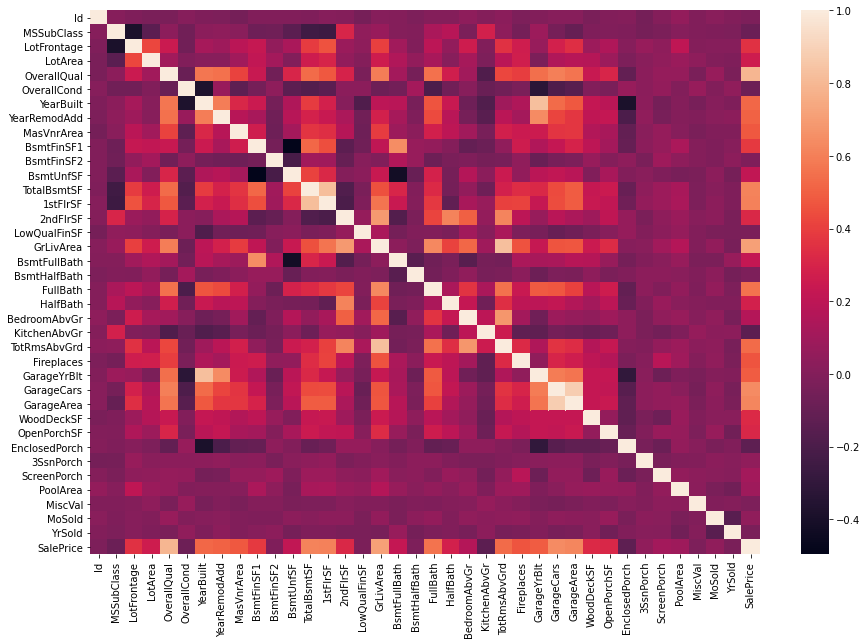

In [37]:
plt.figure(figsize = (15,10))
sns.heatmap(train_data.corr())

In [40]:
for i in train_data:
    print(train_data[i].nunique(), "    ", i)

1460      Id
15      MSSubClass
5      MSZoning
110      LotFrontage
1073      LotArea
2      Street
2      Alley
4      LotShape
4      LandContour
2      Utilities
5      LotConfig
3      LandSlope
25      Neighborhood
9      Condition1
8      Condition2
5      BldgType
8      HouseStyle
10      OverallQual
9      OverallCond
112      YearBuilt
61      YearRemodAdd
6      RoofStyle
8      RoofMatl
15      Exterior1st
16      Exterior2nd
4      MasVnrType
327      MasVnrArea
4      ExterQual
5      ExterCond
6      Foundation
4      BsmtQual
4      BsmtCond
4      BsmtExposure
6      BsmtFinType1
637      BsmtFinSF1
6      BsmtFinType2
144      BsmtFinSF2
780      BsmtUnfSF
721      TotalBsmtSF
6      Heating
5      HeatingQC
2      CentralAir
5      Electrical
753      1stFlrSF
417      2ndFlrSF
24      LowQualFinSF
861      GrLivArea
4      BsmtFullBath
3      BsmtHalfBath
4      FullBath
3      HalfBath
8      BedroomAbvGr
4      KitchenAbvGr
4      KitchenQual
12      TotRmsAbvGrd

In [42]:
for i in train_data:
    print(train_data[i].value_counts())

1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: Id, Length: 1460, dtype: int64
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
112.0      1
138.0      1
149.0      1
38.0       1
111.0      1
Name: LotFrontage, Length: 110, dtype: int64
7200     25
9600     24
6000     17
8400     14
9000     14
         ..
13031     1
10991     1
8944      1
6897      1
8190      1
Name: LotArea, Length: 1073, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
